<a href="https://colab.research.google.com/github/nimish1402/-Comparative-analysis-for-Alzheimer-s-Disease-Prediction-/blob/main/AD_using_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALZHEIMERS USING SVM MODEL

# Import images, extract the corners, and measure distances (Features)

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 97% 33.0M/34.1M [00:00<00:00, 42.6MB/s]
100% 34.1M/34.1M [00:00<00:00, 41.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/alzheimers-dataset-4-class-of-images.zip")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
directory = '/content/data/results/'
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

def process_images(path, category):
    dirs = os.listdir(path)
    for item in dirs:
        if os.path.isfile(os.path.join(path, item)):
            img = cv2.imread(os.path.join(path, item), cv2.IMREAD_COLOR)
            im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            im = cv2.resize(im, (190, 340))
            x, y, w, h = cv2.boundingRect(im)
            ret, thresh = cv2.threshold(im, 127, 255, 0)
            contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnt = contours[0]
            M = cv2.moments(cnt)

            if int(M['m00']) == 0:
                cx = 0
            else:
                cx = int(M['m10'] / M['m00'])

            if int(M['m00']) == 0:
                cy = 0
            else:
                cy = int(M['m01'] / M['m00'])

            corners = cv2.goodFeaturesToTrack(im, 35, 0.01, 10)
            corners = np.int0(corners)
            X = []
            Y = []
            for i in corners:
                x, y = i.ravel()
                x = x - cx
                y = y - cy
                X.append(x)
                Y.append(y)

            tab = np.array([X, Y])
            tab = tab.T
            distance = []
            distance.append(category)
            for i in range(tab.shape[0]):
                dis = ((tab[i, 0]) ** 2 + (tab[i, 1]) ** 2) ** 0.5
                distance.append(dis)

            data = pd.DataFrame(distance, columns=[category])
            data.to_csv(f'/content/data/results/{item}.csv', index=False)

# Process training images
train_path = "/content/Alzheimer_s Dataset/train/NonDemented"
process_images(train_path, 'NonDemented')

# Process test images
test_path = "/content/Alzheimer_s Dataset/test/NonDemented"
process_images(test_path, 'NonDemented')

<ipython-input-6-bd7e18bf1163>:30: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

def process_images(path, category):
    dirs = os.listdir(path)
    for item in dirs:
        if os.path.isfile(os.path.join(path, item)):
            img = cv2.imread(os.path.join(path, item), cv2.IMREAD_COLOR)
            im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            im = cv2.resize(im, (190, 340))
            x, y, w, h = cv2.boundingRect(im)
            ret, thresh = cv2.threshold(im, 127, 255, 0)
            contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnt = contours[0]
            M = cv2.moments(cnt)

            if int(M['m00']) == 0:
                cx = 0
            else:
                cx = int(M['m10'] / M['m00'])

            if int(M['m00']) == 0:
                cy = 0
            else:
                cy = int(M['m01'] / M['m00'])

            corners = cv2.goodFeaturesToTrack(im, 35, 0.01, 10)
            corners = np.int0(corners)
            X = []
            Y = []
            for i in corners:
                x, y = i.ravel()
                x = x - cx
                y = y - cy
                X.append(x)
                Y.append(y)

            tab = np.array([X, Y])
            tab = tab.T
            distance = []
            distance.append(category)
            for i in range(tab.shape[0]):
                dis = ((tab[i, 0]) ** 2 + (tab[i, 1]) ** 2) ** 0.5
                distance.append(dis)

            data = pd.DataFrame(distance, columns=[category])
            data.to_csv(f'/content/data/results/{item}.csv', index=False)

# Process training images
train_path = "/content/Alzheimer_s Dataset/train/MildDemented"
process_images(train_path, 'MildDemented')

# Process test images
test_path = "/content/Alzheimer_s Dataset/test/MildDemented"
process_images(test_path, 'MildDemented')

<ipython-input-7-3fbd1c04aa80>:30: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

def process_images(path, category):
    dirs = os.listdir(path)
    for item in dirs:
        if os.path.isfile(os.path.join(path, item)):
            img = cv2.imread(os.path.join(path, item), cv2.IMREAD_COLOR)
            im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            im = cv2.resize(im, (190, 340))
            x, y, w, h = cv2.boundingRect(im)
            ret, thresh = cv2.threshold(im, 127, 255, 0)
            contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnt = contours[0]
            M = cv2.moments(cnt)

            if int(M['m00']) == 0:
                cx = 0
            else:
                cx = int(M['m10'] / M['m00'])

            if int(M['m00']) == 0:
                cy = 0
            else:
                cy = int(M['m01'] / M['m00'])

            corners = cv2.goodFeaturesToTrack(im, 35, 0.01, 10)
            corners = np.int0(corners)
            X = []
            Y = []
            for i in corners:
                x, y = i.ravel()
                x = x - cx
                y = y - cy
                X.append(x)
                Y.append(y)

            tab = np.array([X, Y])
            tab = tab.T
            distance = []
            distance.append(category)
            for i in range(tab.shape[0]):
                dis = ((tab[i, 0]) ** 2 + (tab[i, 1]) ** 2) ** 0.5
                distance.append(dis)

            data = pd.DataFrame(distance, columns=[category])
            data.to_csv(f'/content/data/results/{item}.csv', index=False)

# Process training images

train_path = "/content/Alzheimer_s Dataset/train/ModerateDemented"
process_images(train_path, 'ModerateDemented')

# Process test images
test_path = "/content/Alzheimer_s Dataset/train/ModerateDemented"
process_images(test_path, 'ModerateDemented')

<ipython-input-8-63cf40471813>:30: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

def process_images(path, category):
    dirs = os.listdir(path)
    for item in dirs:
        if os.path.isfile(os.path.join(path, item)):
            img = cv2.imread(os.path.join(path, item), cv2.IMREAD_COLOR)
            im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            im = cv2.resize(im, (190, 340))
            x, y, w, h = cv2.boundingRect(im)
            ret, thresh = cv2.threshold(im, 127, 255, 0)
            contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnt = contours[0]
            M = cv2.moments(cnt)

            if int(M['m00']) == 0:
                cx = 0
            else:
                cx = int(M['m10'] / M['m00'])

            if int(M['m00']) == 0:
                cy = 0
            else:
                cy = int(M['m01'] / M['m00'])

            corners = cv2.goodFeaturesToTrack(im, 35, 0.01, 10)
            corners = np.int0(corners)
            X = []
            Y = []
            for i in corners:
                x, y = i.ravel()
                x = x - cx
                y = y - cy
                X.append(x)
                Y.append(y)

            tab = np.array([X, Y])
            tab = tab.T
            distance = []
            distance.append(category)
            for i in range(tab.shape[0]):
                dis = ((tab[i, 0]) ** 2 + (tab[i, 1]) ** 2) ** 0.5
                distance.append(dis)

            data = pd.DataFrame(distance, columns=[category])
            data.to_csv(f'/content/data/results/{item}.csv', index=False)

# Process training images
train_path = "/content/Alzheimer_s Dataset/train/VeryMildDemented"
process_images(train_path, 'VeryMildDemented')

# Process test images
test_path = "/content/Alzheimer_s Dataset/test/VeryMildDemented"
process_images(test_path, 'VeryMildDemented')

<ipython-input-9-343d8cd2da1f>:30: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


# Concatenate all the vectors of features

In [ ]:
import glob
import pandas as pd
import os
path='/content/data/results/'

os.chdir(path)
extension = 'csv'
#files= os.listdir(path)
files = [i for i in glob.glob('*.{}'.format(extension))]
result = pd.concat([pd.read_csv(path+f) for f in files],axis=1)
d=result.to_csv('/content/data/Features.csv')


In [ ]:
import pandas as pd
d=pd.read_csv('/content/data/Features.csv')
d.head()

,Unnamed: 0,MildDemented,VeryMildDemented,NonDemented,NonDemented.1,NonDemented.2,VeryMildDemented.1,NonDemented.3,VeryMildDemented.2,VeryMildDemented.3,...,NonDemented.2762,NonDemented.2763,VeryMildDemented.2238,NonDemented.2764,NonDemented.2765,VeryMildDemented.2239,NonDemented.2766,NonDemented.2767,NonDemented.2768,NonDemented.2769
0,0,MildDemented,VeryMildDemented,NonDemented,NonDemented,NonDemented,VeryMildDemented,NonDemented,VeryMildDemented,VeryMildDemented,...,NonDemented,NonDemented,VeryMildDemented,NonDemented,NonDemented,VeryMildDemented,NonDemented,NonDemented,NonDemented,NonDemented
1,1,93.47192091746055,129.0968628588627,216.9446934128604,100.90094152187085,142.12670403551894,172.74258305351347,245.0673376849718,88.11923740024082,1.4142135623730951,...,322.38641410580567,97.40636529508737,302.0761493398643,87.31551981177229,164.87874332369228,198.72594194015034,82.34682750416071,163.24827717314508,58.309518948453004,129.3560976529518
2,2,22.561028345356956,198.84164553734712,260.5417432965397,122.5275479229059,104.66135867644753,179.56892826989863,174.4849563716024,319.4620478241508,148.16544806398016,...,323.83946640272245,125.22779244241272,168.6001186239203,136.5283853270081,131.2288078129189,166.13849644197458,177.53027910753704,161.4094173212951,229.5125268912353,173.64331256918592
3,3,169.01183390520322,165.07574019219177,262.1907702418222,79.84985911070852,50.20956084253277,324.4102341172362,137.05838172107534,111.19802156513397,89.55445270895244,...,239.77072381756702,138.70832707519762,101.96568050084302,160.15305179733542,209.29644048573783,189.0026454841307,159.02201105507376,140.0,81.39410298049853,240.160363090998
4,4,115.0,268.8810145770802,254.568261965234,225.03555274667156,91.0659101969557,237.80033641691932,213.974297521922,137.6117727521886,15.652475842498529,...,125.19584657647394,76.27581530209953,104.4030650891055,217.84857125994654,176.40011337864837,179.17868176767013,140.87228258248675,53.33854141237835,225.00888871331284,125.39936203984452


In [ ]:
d=d.T

In [ ]:
d1=d.to_csv('/content/data/FeaturesSVM.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Preprocessing


In [ ]:
data = pd.read_csv('/content/data/FeaturesSVM.csv')

In [ ]:
data = data.drop([0], axis=0)
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
1,MildDemented,93.471921,22.561028,169.011834,115.000000,237.427884,43.081318,54.203321,140.064271,137.014598,...,189.187737,91.005494,179.426865,72.449983,188.162164,181.220860,32.526912,109.658561,84.723078,208.240246
2,VeryMildDemented,129.096863,198.841646,165.075740,268.881015,246.641440,275.965578,99.639350,91.241438,106.887792,...,101.769347,296.445611,300.467968,298.839422,84.059503,265.092437,124.036285,281.774733,116.516093,317.543698
3,NonDemented,216.944693,260.541743,262.190770,254.568262,130.172962,181.471761,133.296662,307.522357,320.112480,...,182.784026,139.176147,206.886442,151.238223,189.029098,113.278418,166.811271,135.070352,82.975900,289.276684
4,NonDemented,100.900942,122.527548,79.849859,225.035553,141.675686,184.762009,90.824006,159.815519,268.990706,...,247.396443,104.307238,236.326046,112.946890,254.232177,121.655251,93.407708,302.803567,137.277092,223.680576
5,NonDemented,142.126704,104.661359,50.209561,91.065910,88.865066,164.468842,90.686272,66.648331,168.751296,...,109.836242,92.956979,124.663547,155.232084,37.054015,130.751673,123.434193,137.437258,131.137333,132.608446


**checking data imbalance**

Class Counts:
0
NonDemented         2770
VeryMildDemented    2240
MildDemented         727
ModerateDemented      52
Name: count, dtype: int64

Class Percentage:
0
NonDemented         47.849369
VeryMildDemented    38.694075
MildDemented        12.558300
ModerateDemented     0.898255
Name: count, dtype: float64


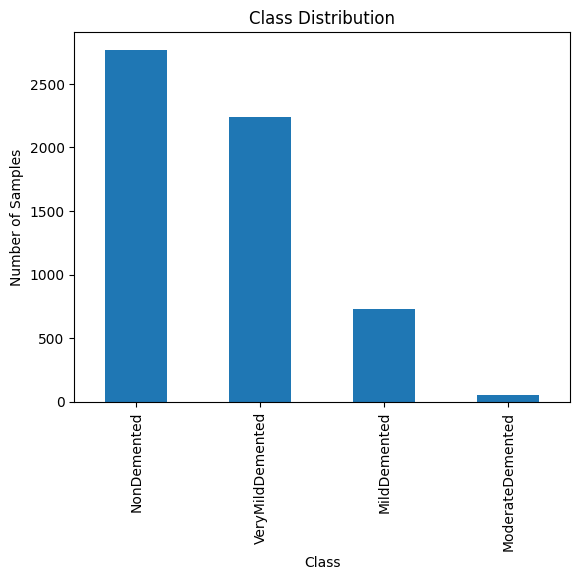

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'data'
# 'target_column' is the name of the column containing the target labels

def check_imbalance(data, target_column):
    # Count the number of samples in each class
    class_counts = data[target_column].value_counts()

    # Calculate the percentage of samples in each class
    class_percentage = class_counts / len(data) * 100

    # Display the class counts and percentages
    print("Class Counts:")
    print(class_counts)
    print("\nClass Percentage:")
    print(class_percentage)

    # Plot a bar chart to visualize class distribution
    class_counts.plot(kind='bar', title='Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.show()

# Call the function with your dataset and target column name
check_imbalance(data, '0')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# convert to cateogry dtype
data['0'] = data['0'].astype('category')
# convert to category codes
data['0'] = data['0'].cat.codes

In [ ]:
continuous=['1','2','3','4','5','6','7','8','9',
           '10','11','12','13','14','15','16','17','18','19',
           '20','21','22','23','24','25','26','27','28','29',
           '30','31','32','33','34','35']

scaler = MinMaxScaler(feature_range=(0, 4))
for var in continuous:
    data[var] = data[var].astype('float64')
    data[var] = scaler.fit_transform(data[var].values.reshape(-1,1))

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
1,0,1.140835,0.275360,2.062808,1.395641,2.897833,0.515179,0.661557,1.709500,1.665154,...,2.303882,1.103033,2.164883,0.865076,2.291326,2.211820,0.381380,1.320110,1.024977,2.541595
2,3,1.575641,2.426884,2.014767,3.279524,3.010286,3.366256,1.216109,1.113612,1.296328,...,1.233665,3.620738,3.662641,3.654326,1.016853,3.235482,1.503102,3.435238,1.414202,3.875656
3,2,2.647834,3.179940,3.200067,3.104300,1.588775,2.209419,1.626900,3.753344,3.906723,...,2.225484,1.693373,2.504667,1.835794,2.301940,1.382575,2.027438,1.632395,1.003587,3.530654
4,2,1.231507,1.495462,0.974576,2.742747,1.729167,2.249700,1.108517,1.950566,3.280867,...,3.016500,1.266048,2.868951,1.364022,3.100186,1.484816,1.127657,3.693661,1.668367,2.730046
5,2,1.734672,1.277403,0.612813,1.102629,1.084608,2.001262,1.106836,0.813450,2.053689,...,1.332424,1.126949,1.487244,1.885000,0.441390,1.595838,1.495721,1.661481,1.593202,1.618501


In [ ]:
X = data.drop('0', axis=1)
y = data['0']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
y_test

4836    2
4601    3
3359    2
4080    3
1355    3
       ..
5174    0
3384    2
3610    2
957     0
5416    2
Name: 0, Length: 1158, dtype: int8

In [ ]:
X_test=X_test.dropna(axis='rows',how='any')
X_train=X_train.dropna(axis='rows',how='any')

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int8)

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0   0 146   0]
 [  0   0  12   0]
 [  0   0 509   0]
 [  0   0 491   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.00      0.00      0.00        12
           2       0.44      1.00      0.61       509
           3       0.00      0.00      0.00       491

    accuracy                           0.44      1158
   macro avg       0.11      0.25      0.15      1158
weighted avg       0.19      0.44      0.27      1158



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy: {}%".format(svclassifier.score(X_test, y_test) * 100 ))

Accuracy: 43.955094991364426%


Since this code dosent show any promising results as there a huge data imbalance , so as to overcome this I will combine the three class (mild demented , moderately demented and very mild demented) that tells that the person has alzheimer and will reduce the number of classes from 4 to 2 in the SVM-kernel-final notebook